###Μηχανική Μάθηση
####1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

 `⚠️  Το σύνολο δεδομένων που σας δόθηκε δεν πρέπει να εμπλουτισθεί με οποιοδήποτε τρόπο. Η εργασία στην οποία θα χρησιμοποιηθεί εμπλουτισμένο σύνολο δεδομένων, δεν θα διορθωθεί.`

Ονοματεπώνυμο φοιτητή: Παπανικολάου Αριάδνη

Α.Μ.: 03120097

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [1]:
import pandas as pd

train_df = pd.read_csv('train-val.csv')

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [2]:
import pandas as pd

test_df = pd.read_csv('test.csv')

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [3]:
#2a
num_samples_train, num_features_train = train_df.shape
print(num_samples_train, ',', num_features_train-1) #excluding RainTomorrow, which is my target

48423 , 23


In [4]:
#2β
feature_types = train_df.dtypes.values
print(feature_types)

[dtype('int64') dtype('O') dtype('O') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('O')
 dtype('float64') dtype('O') dtype('O') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64')]


In [5]:
#2γ
feature_labels = train_df.columns
print(feature_labels)

Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [6]:
#2δ
#in our dataset, categorical values have to do with location, wind direction and rain (binary)
#Locations
num_locations = train_df['Location'].nunique()
print("Number of locations:",num_locations)

#Wind direction
all_wind_directions = pd.concat([train_df['WindGustDir'], train_df['WindDir9am'], train_df['WindDir3pm']])
num_categories_combined = all_wind_directions.nunique()
print("Number of wind directions:", num_categories_combined)

#Rain
all_rain_conditions = pd.concat([train_df['RainToday'], train_df['RainTomorrow']])
num_categories_combined_rain = all_rain_conditions.nunique()
print("Rain possibility values:", num_categories_combined_rain)

Number of locations: 49
Number of wind directions: 16
Rain possibility values: 2


In [7]:
#2ε
# Location
location_counts = train_df['Location'].value_counts()
print("Number of Samples per Location:")
print(location_counts)

# WindGustDir
wind_gust_dir_counts = train_df['WindGustDir'].value_counts()
print("Number of Samples per Wind Gust Direction Category:")
print(wind_gust_dir_counts)

# WindDir9am
wind_dir_9am_counts = train_df['WindDir9am'].value_counts()
print("Number of Samples per Wind Direction at 9 am Category:")
print(wind_dir_9am_counts)

# WindDir3pm
wind_dir_3pm_counts = train_df['WindDir3pm'].value_counts()
print("Number of Samples per Wind Direction at 3 pm Category:")
print(wind_dir_3pm_counts)

# RainToday
rain_today_counts = train_df['RainToday'].value_counts()
print("Number of Samples per Rain Today Category:")
print(rain_today_counts)

# RainTomorrow
rain_tomorrow_counts = train_df['RainTomorrow'].value_counts()
print("Number of Samples per Rain Tomorrow Category:")
print(rain_tomorrow_counts)

Number of Samples per Location:
Location
Sydney              1145
Canberra            1136
Darwin              1107
Perth               1104
MelbourneAirport    1099
Brisbane            1098
Hobart              1096
Adelaide            1064
Sale                1054
MountGambier        1053
Mildura             1048
CoffsHarbour        1046
PerthAirport        1044
Woomera             1044
Bendigo             1042
Cobar               1038
Wollongong          1034
Cairns              1032
SalmonGums          1031
Townsville          1027
Portland            1022
Penrith             1021
Dartmoor            1021
Watsonia            1021
SydneyAirport       1017
Ballarat            1014
WaggaWagga          1013
Launceston          1011
Newcastle           1007
Witchcliffe         1004
AliceSprings        1004
Nuriootpa           1004
Albany               999
Tuggeranong          993
NorahHead            991
GoldCoast            987
Albury               985
Richmond             983
NorfolkIs

In [8]:
#2στ
# Διαλέγω μόνο numeric columns
numeric_columns = train_df.select_dtypes(include='number')

# Υπολογίζω correlation matrix
correlation_matrix = numeric_columns.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     id   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
id             1.000000  0.104771  0.136331 -0.024047     0.096221  0.078911   
MinTemp        0.104771  1.000000  0.715692  0.096510     0.457483  0.053477   
MaxTemp        0.136331  0.715692  1.000000 -0.103864     0.586798  0.469859   
Rainfall      -0.024047  0.096510 -0.103864  1.000000    -0.069284 -0.210261   
Evaporation    0.096221  0.457483  0.586798 -0.069284     1.000000  0.351482   
Sunshine       0.078911  0.053477  0.469859 -0.210261     0.351482  1.000000   
WindGustSpeed  0.047488  0.163349  0.013580  0.160382     0.194751 -0.051283   
WindSpeed9am   0.062482  0.193476  0.003229  0.102262     0.208774 -0.001514   
WindSpeed3pm   0.040819  0.183079  0.054409  0.068231     0.154487  0.055941   
Humidity9am   -0.129400 -0.232420 -0.485241  0.217506    -0.521304 -0.471021   
Humidity3pm   -0.085483  0.021193 -0.504320  0.258283    -0.392778 -0.634892   
Pressure9am   -0.104

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;

In [9]:
#Το χαρακτηριστικό id δεν χρησιμοποιείται στην προπόνηση του μοντέλου, οπότε μπορούμε να μην το επιλέξουμε
#Η ημερομηνία θα μπορούσε να επεξεργαστεί, ώστε να εξάγουμε πληροφορίες για την εβδομάδα/τον μήνα/την εποχή/τον χρόνο στα οποία κάθε φορά βρισκόμαστε. Θα εξάγουμε πληροφορία για τον μήνα, αφού μπορεί να μας χρησιμεύσει περισσότερο στην πρόβλεψη και είναι πιο χαρακτηριστικός για την πρόβλεψη του καιρού.
#την αρχική πληροφορία 'Date' δεν την επιλέγουμε
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Month'] = train_df['Date'].dt.month
train_df = train_df.drop(['id', 'Date'], axis=1)

#Για τα χαρακτηριστικά τα οποία έχουν πληροφορίες τόσο για το πρωί όσο και για το μεσημέρι, θα μπορούσαμε να προσθέσουμε χαρακτηριστικά όπως διαφορά θερμοκρασίας ή διαφορά πίεσης μέσα στη μέρα.

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [10]:
columns_to_drop_na = ['Month', 'Location', 'WindGustDir', 'WindGustSpeed', 
                       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 
                       'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

train_df = train_df.dropna(subset=columns_to_drop_na)

# maxtemp και temp3pm έχουν μεγάλο correlation, οπότε συμπληρώνουμε όποιο είναι missing με το άλλο
train_df['MaxTemp'].fillna(train_df['Temp3pm'], inplace=True)
train_df['Temp3pm'].fillna(train_df['MaxTemp'], inplace=True)

# Συμπληρώνω όλα τα non numeric με το median
numeric_columns = train_df.select_dtypes(include='number').columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].median())

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [11]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
train_df['WindGustDir'] = le.fit_transform(train_df['WindGustDir'])
train_df['WindDir9am'] = le.fit_transform(train_df['WindDir9am'])
train_df['WindDir3pm'] = le.fit_transform(train_df['WindDir3pm'])
train_df['RainToday'] = le.fit_transform(train_df['RainToday'])
train_df['RainTomorrow'] = le.fit_transform(train_df['RainTomorrow'])
train_df['Location'] = le.fit_transform(train_df['Location'])

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [12]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                      'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                      'Temp9am', 'Temp3pm']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected features and transform the data
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [13]:
X = train_df.drop('RainTomorrow', axis=1)
y = train_df['RainTomorrow']

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Δημιουργία των ταξινομητών
nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
logreg_classifier = LogisticRegression(max_iter=1000)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)  # Παράδειγμα: Ένα κρυφό επίπεδο με 100 νευρώνες
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

# Εκπαίδευση των ταξινομητών
classifiers = [nb_classifier, knn_classifier, logreg_classifier, mlp_classifier, svc_classifier, dt_classifier, rf_classifier]
classifier_names = ['Naive Bayes', 'KNeighbors', 'Logistic Regression', 'MLP', 'SVC', 'Decision Tree', 'Random Forest']

for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    print(f"{name}: Ακρίβεια επί του συνόλου επικύρωσης - {score}")

Naive Bayes: Ακρίβεια επί του συνόλου επικύρωσης - 0.8028784374196865
KNeighbors: Ακρίβεια επί του συνόλου επικύρωσης - 0.8149575944487278
Logistic Regression: Ακρίβεια επί του συνόλου επικύρωσης - 0.8489677032468089
MLP: Ακρίβεια επί του συνόλου επικύρωσης - 0.8538507667266341
SVC: Ακρίβεια επί του συνόλου επικύρωσης - 0.8483680287843742
Decision Tree: Ακρίβεια επί του συνόλου επικύρωσης - 0.7963676861132528
Random Forest: Ακρίβεια επί του συνόλου επικύρωσης - 0.8559067934549816


4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).

In [16]:
naive_bayes_predictions = nb_classifier.predict(X_val)
knn_predictions = knn_classifier.predict(X_val)
logreg_predictions = logreg_classifier.predict(X_val)
mlp_predictions = mlp_classifier.predict(X_val)
svc_predictions = svc_classifier.predict(X_val)
decision_tree_predictions = dt_classifier.predict(X_val)
random_forest_predictions = rf_classifier.predict(X_val)


4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [17]:
from sklearn.metrics import f1_score

f1_scores = []  # Initialize an empty list to store F1 scores

models = {
    'Naive Bayes': naive_bayes_predictions,
    'KNeighbors': knn_predictions,
    'Logistic Regression': logreg_predictions,
    'MLP': mlp_predictions,
    'SVC': svc_predictions,
    'Decision Tree': decision_tree_predictions,
    'Random Forest': random_forest_predictions
}

for model_name, predictions in models.items():
    f1 = f1_score(y_val, predictions)
    f1_scores.append(f1)  # Append F1 score to the array
    print(f"{model_name}: F1 Score - {f1}")

Naive Bayes: F1 Score - 0.6083404255319149
KNeighbors: F1 Score - 0.5079726651480638
Logistic Regression: F1 Score - 0.6194690265486725
MLP: F1 Score - 0.624063464081093
SVC: F1 Score - 0.5947802197802198
Decision Tree: F1 Score - 0.5623273798563799
Random Forest: F1 Score - 0.6313020604997808


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


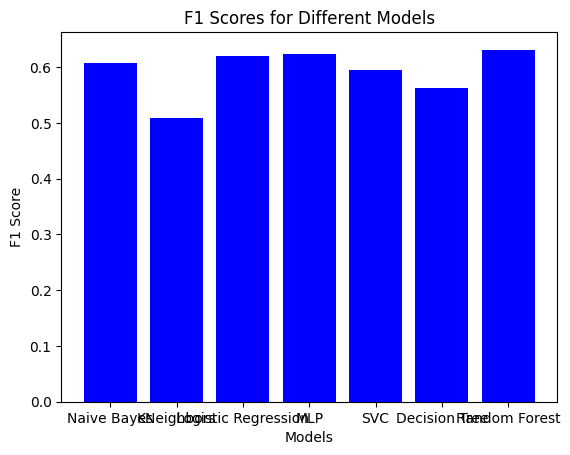

In [18]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(models.keys(), f1_scores, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')

# Show the plot
plt.show()

#MLP καλύτερη επίδοση

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το σύνολο εκπαίδευσης [test set](https://drive.google.com/file/d/1bcmuoeRVY0y5ZuY6nZcmzy8_5fOFR4Oa/view?usp=drive_link).


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Transform Date column
test_df['Date'] = pd.to_datetime(test_df['Date'], dayfirst=True)
test_df['Month'] = test_df['Date'].dt.month
test_df = test_df.drop(['Date'], axis=1)

# Fill missing values in 'MaxTemp' and 'Temp3pm'
test_df['MaxTemp'].fillna(test_df['Temp3pm'], inplace=True)
test_df['Temp3pm'].fillna(test_df['MaxTemp'], inplace=True)

# Fill missing numeric values with the median
numeric_columns = test_df.select_dtypes(include='number').columns
test_df[numeric_columns] = test_df[numeric_columns].fillna(test_df[numeric_columns].median())

# Fill missing non-numeric values with the mode
non_numeric_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for column in non_numeric_columns:
    test_df[column].fillna(test_df[column].mode().iloc[0], inplace=True)

# Encode non-numeric columns
le = LabelEncoder()
for column in non_numeric_columns:
    test_df[column] = le.fit_transform(test_df[column])

# Feature scaling
features_to_scale = ['Month', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                      'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                      'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']

scaler = StandardScaler()
test_df[features_to_scale] = scaler.fit_transform(test_df[features_to_scale])

# Make predictions using the model
test_predictions = mlp_classifier.predict(test_df)


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [20]:
# Generate 'id' column based on the index
test_df['id'] = test_df.index + 1

# Create a DataFrame with 'id' and 'prediction' columns
predictions_df = pd.DataFrame({'id': test_df['id'], 'prediction': test_predictions})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [21]:
#Naive Bayes:
# No hyperparameter grid for Naive Bayes
from sklearn.model_selection import GridSearchCV

#knn:
# Define the hyperparameter grid
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Create the GridSearchCV object
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='f1')

# Fit the model to the
data
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_


#Logistic regression:
# Define the hyperparameter grid
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 500, 1000, 2000]}

# Create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg_classifier, param_grid_logreg, cv=5, scoring='f1')

# Fit the model to the data
grid_search_logreg.fit(X_train, y_train)

# Get the best hyperparameters
best_params_logreg = grid_search_logreg.best_params_


#mlp:
# Define the hyperparameter grid
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'max_iter': [100, 200, 300, 500]}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp_classifier, param_grid_mlp, cv=5, scoring='f1')

# Fit the model to the data
grid_search_mlp.fit(X_train, y_train)

# Get the best hyperparameters
best_params_mlp = grid_search_mlp.best_params_


#svc:
# Define the hyperparameter grid
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(svc_classifier, param_grid_svc, cv=5, scoring='f1')

# Fit the model to the data
grid_search_svc.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svc = grid_search_svc.best_params_


#decision tree:
# Define the hyperparameter grid
param_grid_dt = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='f1')

# Fit the model to the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_


#random forest:
# Define the hyperparameter grid
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='f1')

# Fit the model to the data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

C:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [22]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier(**best_params_knn)
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_val)

# Logistic Regression
logreg_classifier = LogisticRegression(**best_params_logreg)
logreg_classifier.fit(X_train, y_train)
logreg_predictions = logreg_classifier.predict(X_val)

# MLP
mlp_classifier = MLPClassifier(**best_params_mlp)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_val)

# SVC
svc_classifier = SVC(**best_params_svc)
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_val)

# Decision Tree
dt_classifier = DecisionTreeClassifier(**best_params_dt)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_val)

# Random Forest
rf_classifier = RandomForestClassifier(**best_params_rf)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_val)

C:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ariad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [27]:
f1_scores = []  # Initialize an empty list to store F1 scores

# F1 Score for K-Nearest Neighbors (KNN)
f1_knn = f1_score(y_val, knn_predictions)
f1_scores.append(f1_knn)  # Append F1 score to the array

# F1 Score for Logistic Regression
f1_logreg = f1_score(y_val, logreg_predictions)
f1_scores.append(f1_logreg)  # Append F1 score to the array

# F1 Score for Multi-Layer Perceptron (MLP)
f1_mlp = f1_score(y_val, mlp_predictions)
f1_scores.append(f1_mlp)  # Append F1 score to the array

# F1 Score for Support Vector Classifier (SVC)
f1_svc = f1_score(y_val, svc_predictions)
f1_scores.append(f1_svc)  # Append F1 score to the array

# F1 Score for Decision Tree
f1_dt = f1_score(y_val, dt_predictions)
f1_scores.append(f1_dt)  # Append F1 score to the array

# F1 Score for Random Forest
f1_rf = f1_score(y_val, rf_predictions)
f1_scores.append(f1_rf)  # Append F1 score to the array

# Print or use the F1 scores as needed
print("F1 Score for K-Nearest Neighbors (KNN):", f1_knn)
print("F1 Score for Logistic Regression:", f1_logreg)
print("F1 Score for Multi-Layer Perceptron (MLP):", f1_mlp)
print("F1 Score for Support Vector Classifier (SVC):", f1_svc)
print("F1 Score for Decision Tree:", f1_dt)
print("F1 Score for Random Forest:", f1_rf)

F1 Score for K-Nearest Neighbors (KNN): 0.5174129353233832
F1 Score for Logistic Regression: 0.6175255490323984
F1 Score for Multi-Layer Perceptron (MLP): 0.6466610312764159
F1 Score for Support Vector Classifier (SVC): 0.6146953405017922
F1 Score for Decision Tree: 0.5895363675031902
F1 Score for Random Forest: 0.6406489804867354


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


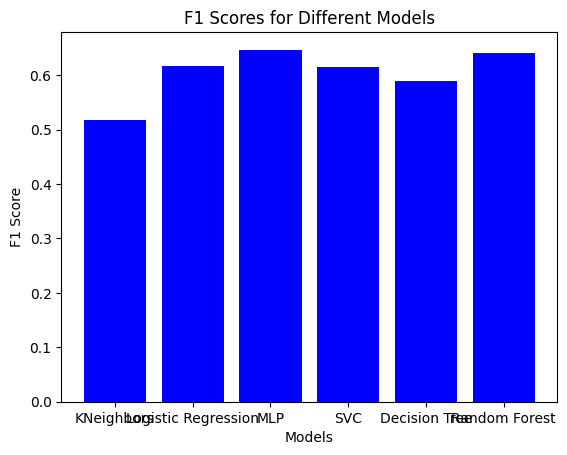

In [28]:
# Exclude the first model
model_names = list(models.keys())[1:]

# Create a bar chart
plt.bar(model_names, f1_scores, color='blue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')

# Show the plot
plt.show()

#καλύτερη επίδοση: Random Forest

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [29]:
test_df = test_df.drop('id', axis=1)

#προβλέψεις:
test_predictions = rf_classifier.predict(test_df)

7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [30]:
# Generate 'id' column based on the index
test_df['id'] = test_df.index + 1

# Create a DataFrame with 'id' and 'prediction' columns
predictions_df = pd.DataFrame({'id': test_df['id'], 'prediction': test_predictions})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions2.csv', index=False)